La fonction est définie de $R^2$ à valeurs dans $R$ :

$$ f(x_1, x_2) = a \cdot x_1^2 + b \cdot x_2^2 + c \cdot x_1 \cdot x_2 + d \cdot x_1 + e \cdot x_2 + f $$

Le gradient de la fonction peut être représenté par le vecteur gradient :

$$ \nabla f = \begin{bmatrix} \frac{\partial f}{\partial x_1} \\ \frac{\partial f}{\partial x_2} \end{bmatrix} = \begin{bmatrix} 2 \cdot a \cdot x_1 + c \cdot x_2 + d \\ 2 \cdot b \cdot x_2 + c \cdot x_1 + e \end{bmatrix} $$


La méthode du gradient à pas fixe consiste à mettre à jour itérativement une solution initiale en utilisant la formule suivante :

$$ x_{k+1} = x_k - \rho \cdot \nabla f(x_k) $$

**Choix du pas pour la convergence**

L'inégalité $0 < \rho < \frac{2}{M}$ doit être satisfaite, où $M$ est la constante de Lipschitz du $\nabla f$



## Algorithme de la méthode du gradient projeté

1. **Initialisation :** Choisir un point initial $ x_0 $, un pas $ \rho $, une précision (tol) $\epsilon$, et définir un ensemble convexe $ C $ qui représente les contraintes du problème.
   
2. **Itération :**
   - Pour $ k = 0, 1, 2, \ldots K_{max}$:
     1. Calculer le gradient $ \nabla f(x_k) $.
     2. Mettre à jour la solution : $ x_{k+1} = \text{Proj}_C(x_k - \rho \cdot \nabla f(x_k)) $, où $ \text{Proj}_C $ est l'opérateur de projection sur l'ensemble convexe $ C $.
     3. Vérifier le critère d'arrêt : si $ \| x_{k+1} - x_k \| < \epsilon $, arrêter l'algorithme.

3. **Sortie :** La solution optimale est $ x_{k+1} $ (ou une approximation de celle-ci).



## Explications du code
- initialisation et calcul du premier gradient + mettre la différence en +oo pour rentrer dans la boucle
- on calcule $ x_{k+1}$ par la variable x_new
- calcul de la différence $ x_{k+1} -  x_{k} $ avant la modification des variables
- teste d'arret ici $ x_{k+1} - x_{k} $ *Attention* c'est pas une minimisation sans contraintes on a pas le test du gradient = 0
- mettre la variable x_new dans x_prev $ x_{k+1} $ dans $ x_{k} $ pour calculer $ x_{k+1} $ de l'itération suivante
- calcul du gradient au point $ x_{k+1} $ pour l'itération suivante

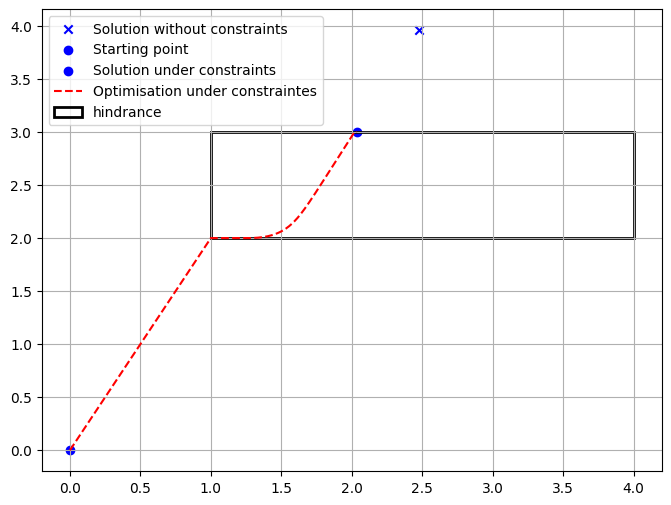

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches  # pour crée un rectangle

a = 3.56
b = 1
c = -3.2
d = -5
e = 0
f = 9.39


def F(x1,x2):
    return a * x1 ** 2 + b * x2 ** 2 + c * x1 * x2 + d * x1 + e * x2 + f

def GradF(x1,x2):
    g1 = 2 * a * x1 + c * x2 + d
    g2 = 2 * b * x2 + c * x1 + e
    return np.array([g1,g2])

 
def fixed_step_gradient(v_ini,rho,GradF,NitMax,tol):
    v = v_ini
    k = 0
    direction_descente = GradF(v[0],v[1])
    Suite_values = []
    Suite_values.append(v)
    while (k < NitMax and np.linalg.norm(direction_descente) > tol):
        v = v - rho * direction_descente
        direction_descente = GradF(v[0],v[1]) # mise à jrs
        Suite_values.append(v)
        k += 1

    if(k == NitMax):
        convergence = False
    else:
        convergence = True
    Suite_values = np.array(Suite_values)
    return Suite_values,v,k,convergence


a1 = 1
b1 = 4
a2 = 2
b2 = 3

tab_a = np.array([a1,a2])
tab_b = np.array([b1,b2])

def cord_projection(x): # attention vecteur défini de R^2 à valeurs dans R^2 : cette fonction return un vecteur np.array([y1,y2])
    MAX = np.maximum(tab_a,x)  # minimum d'un vecteur cordonnée par cordonnée
    return np.minimum(tab_b,MAX) # maximum d'un vecteur cordonnée par cordonnée



def gradient_projection_method(x_ini,GradF,cord_projection,tol,NitMax,rho):
    # x_prev pour représenter xk
    # x_new pour preprésenter xk+1
    
    k = 0
    x_prev = x_ini
    Suite_values = []
    Suite_values.append(x_prev)
    
    grad_f = GradF(x_prev[0],x_prev[1])
    diff_iter = np.inf  # +oo pour rentrer dans la boucle
    
    while(k < NitMax and np.linalg.norm(diff_iter) > tol):
        x_new = cord_projection(x_prev - rho * grad_f)  # on calcule xk+1 (ici grad_f contient la valeur de l'itération précédente)
        diff_iter = x_new - x_prev # xk+1 - xk (x_prev ici contient la valeur précédente de x_new)
        x_prev = x_new # affectation d'une nouvelle valeur à xk (maintenant xk+1 car on vas sortir de la boucle)
        grad_f = GradF(x_prev[0],x_prev[1]) # calcul du gradient pour l'itération suivante xk+1, est effectué de telle manière qu'il devienne xk à l'étape suivante.
        k += 1
        Suite_values.append(x_new)
    if(k == NitMax):
        convergence = False
    else:
        convergence = True
    Suite_values = np.array(Suite_values)
    return Suite_values,x_new,k,convergence
x0 = np.array([0,0])
rho = 0.01
tol = 1e-3
NitMax = 1000
Suite_Projected_gradient,minF_pg,IterMax,convergence_PG = gradient_projection_method(x0,GradF,cord_projection,tol,NitMax,rho)
Suite_Fixed_Step,minF_fp,Iter,convergence_FSG = fixed_step_gradient(x0,rho,GradF,NitMax,tol)


fig, ax = plt.subplots(figsize = (8,6))
#ax.scatter(Suite_Fixed_Step[:, 0], Suite_Fixed_Step[:, 1], s=10, marker='.')
ax.scatter(minF_fp[0],minF_fp[1],color = 'b',marker = 'x',label = 'Solution without constraints')
ax.scatter(x0[0],x0[1],color = 'b',label ='Starting point')
ax.scatter(minF_pg[0],minF_pg[1],color ='b',label = 'Solution under constraints')
ax.grid(True)
ax.plot(Suite_Projected_gradient[:,0],Suite_Projected_gradient[:,1],linestyle = '--',color = 'r',label = 'Optimisation under constraintes')
rectangle = patches.Rectangle((1, 2), 3, 1, linewidth=2, edgecolor='black', facecolor='none',label = 'hindrance')
ax.add_patch(rectangle)
ax.legend()
